In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df_Fallout = pd.read_csv('./data/r_Fallout.csv')
df_GTA = pd.read_csv('./data/r_GrandTheftAutoV.csv')

## Initial Data Cleaning

In [3]:
# Drop duplicates and null values
df_Fallout = df_Fallout.drop_duplicates()
df_Fallout = df_Fallout.dropna()
df_GTA = df_GTA.drop_duplicates()
df_GTA = df_GTA.dropna()

# Drop posts that were removed from original webscrape
filter1 = df_Fallout['selftext']=='[removed]'
filter2 = df_GTA['selftext']=='[removed]'

df_Fallout = df_Fallout.drop(df_Fallout[filter1].index, axis=0)
df_GTA = df_GTA.drop(df_GTA[filter2].index, axis=0)

In [4]:
# Clear miscellaneous characters
df_Fallout['selftext'] = df_Fallout['selftext'].str.replace('\n', '')
df_GTA['selftext'] = df_GTA['selftext'].str.replace('\n', '')
df_Fallout.columns = ['timestamp', 'author', 'post_text', 'post_title', 'category']
df_GTA.columns = ['timestamp', 'author', 'post_text', 'post_title', 'category']

In [5]:
df_GTA

,timestamp,author,post_text,post_title,category
0,1615996307,Chchbitcheetah,I have a PS4 and looking to find another girl ...,Someone play GTA,GrandTheftAutoV
1,1615994614,MidoriTea,"I know you can do the 50 stunt jumps online, b...",Under the Bridge online?,GrandTheftAutoV
3,1615992134,Litla_Tikin,Could this be because of the update? and is th...,The game is lagging so much all of a sudden...,GrandTheftAutoV
4,1615990906,DivineCheeta,"Hi, im experiencing a bug possibly in Gta Onli...",Treasure hunt issues.,GrandTheftAutoV
7,1615983907,kn00perss,"Hey, is there someone with the same problem as...",Can't run GTA V,GrandTheftAutoV
...,...,...,...,...,...
19992,1576431397,Drewparker69,Does anyone have the gunman unlocked that had ...,Diamond heists gunman locked?,GrandTheftAutoV
19993,1576427982,Litto10,Can someone help me? I have this problem: ever...,Help,GrandTheftAutoV
19996,1576425576,OFF-WH1TE,**PC AND PS4 GTA CARMEETS | HYPE CAR CLUB**📷In...,GTA V CARMEETS,GrandTheftAutoV
19997,1576423854,fox_score,For some reason all my vehicles will go from t...,Cars not leaving second gear,GrandTheftAutoV


In [6]:
df_Fallout

,timestamp,author,post_text,post_title,category
0,1615945779,40classicsfeatJim,I know of the save data issue (as I ran into i...,Is it worth playing New Vegas on PS3?,Fallout
1,1615945739,Caesar-legion,I have heard time and time again that when lan...,Is legate lanius a good leader,Fallout
2,1615945502,politicaly_incorect,Ok hear me out here as i list all the simalari...,Anyone else notice that 2021 looks alot like l...,Fallout
3,1615945411,Mr_Tubberz,So I’m messing around with mods and all of a s...,Can’t reload gun!,Fallout
5,1615945005,Mattlew0YT,"Ok! The war f#cked up US and China, but what a...",What happened with the rest of the world?,Fallout
...,...,...,...,...,...
19994,1596847803,DoctorDanDungus,https://www.youtube.com/watch?v=JJO_tmiwdPE&am...,"Last week I published Part 1 of a fun ""miniser...",Fallout
19995,1596847708,dave41468,"I know there is a way to disable blood, but ho...",Fallout 4 settings,Fallout
19996,1596847509,pravhoven,Some settlements are right next to big sources...,[FO4] Water so close yet so far.,Fallout
19997,1596846928,haha365,"If possible, please give reasons. I always wa...",Is the Ambush Kit worth it?,Fallout


## Text Pre-processing

In [7]:
cvec1 = CountVectorizer(max_features=12_000, min_df=3, max_df=.8, stop_words='english')
cvec2 = CountVectorizer(max_features=12_000, min_df=2, max_df=.9, stop_words='english')

In [8]:
Fallout_corpus = cvec1.fit_transform(df_Fallout['post_text'])
Fallout_post_words = pd.DataFrame(Fallout_corpus.todense(), columns=cvec1.get_feature_names())

GTA_corpus = cvec2.fit_transform(df_GTA['post_text'])
GTA_post_words = pd.DataFrame(GTA_corpus.todense(), columns=cvec2.get_feature_names())

In [9]:
game1 = Fallout_post_words.sum().sort_values(ascending=False).head(40)
game2 = GTA_post_words.sum().sort_values(ascending=False).head(40)

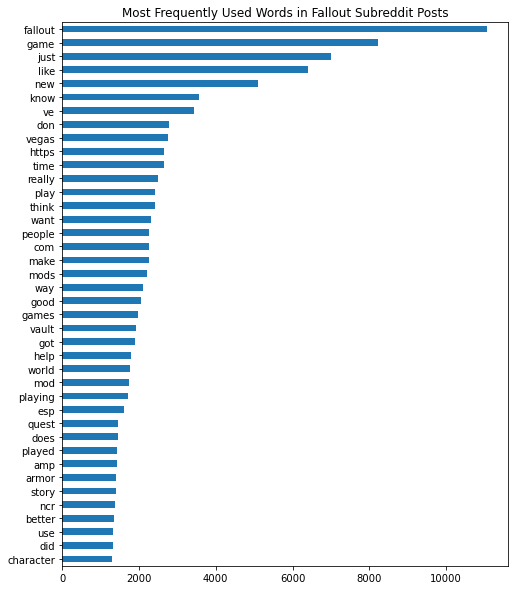

In [10]:
plt.figure(figsize=(8,10))
game1.sort_values(ascending=True).plot(kind='barh');
plt.title('Most Frequently Used Words in Fallout Subreddit Posts');

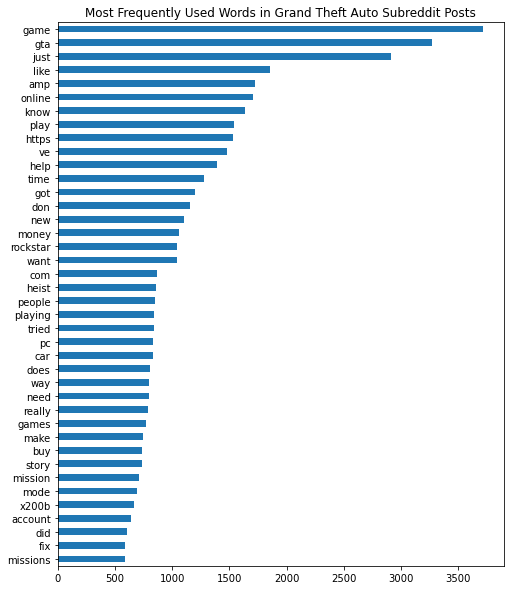

In [11]:
plt.figure(figsize=(8,10))
game2.sort_values(ascending=True).plot(kind='barh');
plt.title('Most Frequently Used Words in Grand Theft Auto Subreddit Posts');

In [12]:
cvec3 = CountVectorizer(max_features=12_000, min_df=3, max_df=.8, stop_words='english')
cvec4 = CountVectorizer(max_features=12_000, min_df=2, max_df=.9, stop_words='english')

In [13]:
Fallout_titles = cvec3.fit_transform(df_Fallout['post_title'])
Fallout_title_words = pd.DataFrame(Fallout_titles.todense(), columns=cvec3.get_feature_names())

GTA_titles = cvec4.fit_transform(df_GTA['post_title'])
GTA_title_words = pd.DataFrame(GTA_titles.todense(), columns=cvec4.get_feature_names())

In [14]:
game1_titles = Fallout_title_words.sum().sort_values(ascending=False).head(30)
game2_titles = GTA_title_words.sum().sort_values(ascending=False).head(30)

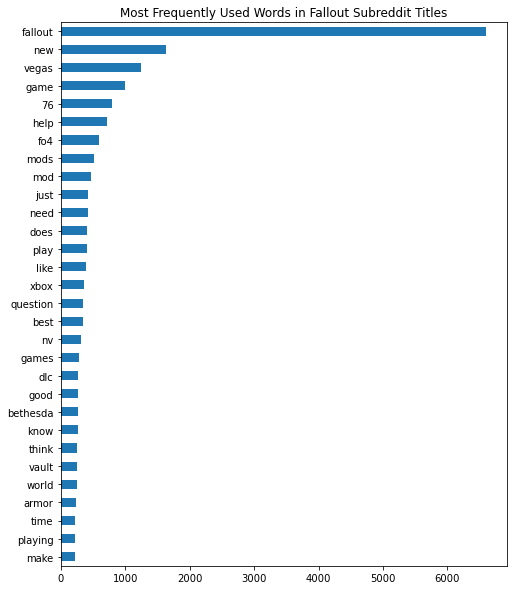

In [15]:
plt.figure(figsize=(8,10))
game1_titles.sort_values(ascending=True).plot(kind='barh');
plt.title('Most Frequently Used Words in Fallout Subreddit Titles');

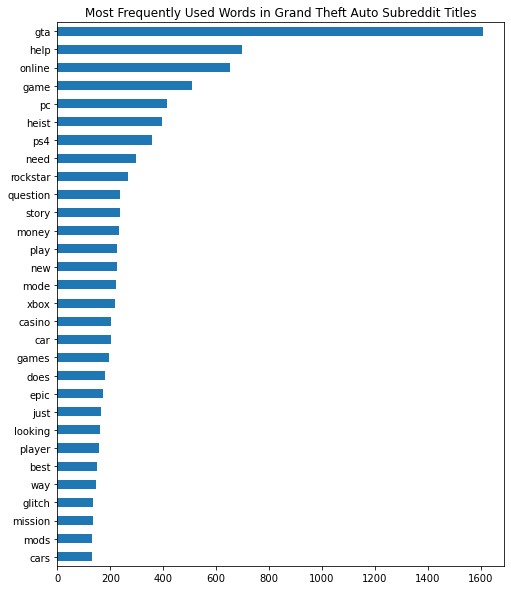

In [16]:
plt.figure(figsize=(8,10))
game2_titles.sort_values(ascending=True).plot(kind='barh');
plt.title('Most Frequently Used Words in Grand Theft Auto Subreddit Titles');

## Feature Engineering

In [17]:
def word_count_df(df, col_title, num_values):
    word_count = df.sum().sort_values(ascending=False).head(num_values)

    keyes = word_count.index
    values = word_count.values

    posts = dict(zip(keyes, values))
    
    post_list = []

    for key, value in posts.items():
        word = {}
        word['word'] = key
        word[col_title] = value
        post_list.append(word)
        
    df_out = pd.DataFrame(post_list, columns=['word', col_title])
    
    return df_out

In [18]:
Fallout_posts = word_count_df(Fallout_post_words, 'post_count', 100)
Fallout_titles = word_count_df(Fallout_title_words, 'title_count', 100)
Fallout_all_words = Fallout_posts.merge(Fallout_titles, how='outer', on='word')
Fallout_all_words['game'] = ['Fallout' for word in Fallout_all_words['word']]

Fallout_all_words

,word,post_count,title_count,game
0,fallout,11069.0,6595.0,Fallout
1,game,8234.0,995.0,Fallout
2,just,7008.0,426.0,Fallout
3,like,6392.0,385.0,Fallout
4,new,5096.0,1640.0,Fallout
...,...,...,...,...
133,creation,NaN,97.0,Fallout
134,future,NaN,97.0,Fallout
135,tips,NaN,96.0,Fallout
136,fo76,NaN,95.0,Fallout


In [19]:
GTA_posts = word_count_df(GTA_post_words, 'post_count', 100)
GTA_titles = word_count_df(GTA_title_words, 'title_count', 100)
GTA_all_words = GTA_posts.merge(GTA_titles, how='outer', on='word')
GTA_all_words['game'] = ['Grand Theft Auto' for word in GTA_all_words['word']]

GTA_all_words

,word,post_count,title_count,game
0,game,3713.0,510.0,Grand Theft Auto
1,gta,3267.0,1607.0,Grand Theft Auto
2,just,2911.0,166.0,Grand Theft Auto
3,like,1855.0,105.0,Grand Theft Auto
4,amp,1725.0,NaN,Grand Theft Auto
...,...,...,...,...
133,low,NaN,53.0,Grand Theft Auto
134,diamond,NaN,53.0,Grand Theft Auto
135,crashing,NaN,53.0,Grand Theft Auto
136,100,NaN,50.0,Grand Theft Auto


In [23]:
word_extraction = pd.concat([Fallout_all_words, GTA_all_words], axis=0)

In [24]:
word_extraction

,word,post_count,title_count,game
0,fallout,11069.0,6595.0,Fallout
1,game,8234.0,995.0,Fallout
2,just,7008.0,426.0,Fallout
3,like,6392.0,385.0,Fallout
4,new,5096.0,1640.0,Fallout
...,...,...,...,...
133,low,NaN,53.0,Grand Theft Auto
134,diamond,NaN,53.0,Grand Theft Auto
135,crashing,NaN,53.0,Grand Theft Auto
136,100,NaN,50.0,Grand Theft Auto


In [26]:
word_extraction.to_csv('./data/top_word_extraction.csv', index=False)